#Data Visualisation 

##Import the **packages**

In [1]:

import pandas as pd 
import string
import nltk
nltk.download('punkt')

from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
import re
from collections import Counter
from wordcloud import WordCloud
from collections import Counter
from nltk.util import ngrams
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder,TrigramAssocMeasures, TrigramCollocationFinder
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


##Load the dataset into dataframe called df

In [2]:
df = pd.read_csv('/content/sample_data/train.csv')

##Describe the dataset



In [3]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##Display the first 5 rows of df

In [4]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


##Remove stopwords and punctuation

In [5]:

# Define stopwords and punctuation
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Function to remove stopwords and punctuation
def remove_stopwords_and_punctuation(comment):
    # Tokenize the comment
    tokens = nltk.word_tokenize(comment)
    # Remove stopwords and punctuation
    filtered_tokens = [token.lower() for token in tokens if token.lower() not in stopwords and token not in punctuation]
    # Join the filtered tokens back into a string
    filtered_comment = ' '.join(filtered_tokens)
    return filtered_comment

# Apply the function to the comment_text column
df['filtered_comment_text'] = df['comment_text'].apply(remove_stopwords_and_punctuation)

# Display the first 5 rows of the updated dataframe
print(df.head())



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  \
0             0        0       0       0              0   
1             0        0       0       0              0   
2             0        0       0       0              0   
3             0        0       0       0              0   
4             0        0       0       0              0   

                               filtered_comment_text  
0  explanation edits made username hardcore metal...  
1  d'aww matches background colour 'm seemingly 

##Count of class_names

### Create a list of column name and count how many samples belong to each class

In [9]:
class_names = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
df[class_names].apply(lambda x: x.value_counts())

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,144277,157976,151122,159093,151694,158166
1,15294,1595,8449,478,7877,1405


###Normalize the values in each class









In [10]:
df[class_names].apply(lambda x: x.value_counts(normalize=True))

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0.904156,0.990004,0.947052,0.997004,0.950636,0.991195
1,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805


###Barchart for count of class_names 

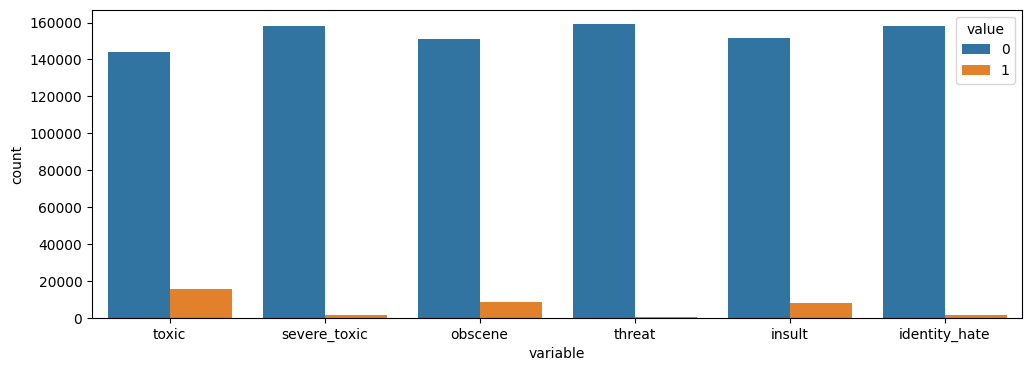

In [11]:
# plot the chart out for better visualization
plt.figure(figsize=(12,4))
sns.countplot(x="variable", hue="value", data=pd.melt(df[class_names]))

plt.show()

We see that less than 10% are marked toxic

In [12]:
# Extract and combine all comments flagged as "Toxic
toxic_df = df[df["toxic"] == 1]
toxic_df = toxic_df["comment_text"].reset_index(drop=True)

toxic_text = ""

for i in range(len(toxic_df)):
    toxic_text += " " + toxic_df[i]
    
toxic_text[:100]

' COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK Hey... what is it..\n@ | talk .\nWhat is it... an exclus'

Find the number of toxic tokens, and displays the first 50 tokens.

This code uses the regular expression module re to extract words from the toxic_text string. 

In [13]:
tokens = re.findall(r'\w+', toxic_text)
print("Number of toxic tokens = "+"{:,}\n".format(len(tokens)))
print(tokens[:50])

Number of toxic tokens = 815,264

['COCKSUCKER', 'BEFORE', 'YOU', 'PISS', 'AROUND', 'ON', 'MY', 'WORK', 'Hey', 'what', 'is', 'it', 'talk', 'What', 'is', 'it', 'an', 'exclusive', 'group', 'of', 'some', 'WP', 'TALIBANS', 'who', 'are', 'good', 'at', 'destroying', 'self', 'appointed', 'purist', 'who', 'GANG', 'UP', 'any', 'one', 'who', 'asks', 'them', 'questions', 'abt', 'their', 'ANTI', 'SOCIAL', 'and', 'DESTRUCTIVE', 'non', 'contribution', 'at', 'WP']


###Make a grouped bar chart where the x-axis has three groups of positive, negative, and neutral sentiments, and for each group, there are two bins showing the count of toxic and non-toxic comments. 

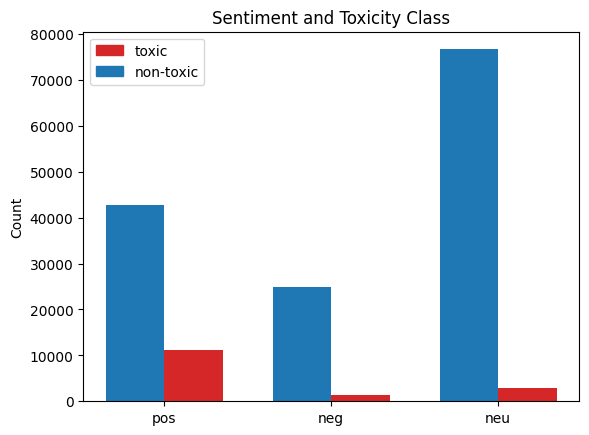

In [32]:

from nltk.sentiment import SentimentIntensityAnalyzer


# Instantiate SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Define a function to get the sentiment of a comment
def get_sentiment(comment):
    sentiment = sia.polarity_scores(comment)['compound']
    if sentiment > 0:
        return 'pos'
    elif sentiment < 0:
        return 'neg'
    else:
        return 'neu'

# Add a new column 'sentiment' to the dataframe
df['sentiment'] = df['comment_text'].apply(get_sentiment)

# Define a function to get the toxicity class of a comment
def get_toxicity_class(row):
    if row['toxic'] == 1:
        return 'toxic'
    else:
        return 'non-toxic'

# Add a new column 'toxicity_class' to the dataframe
df['toxicity_class'] = df.apply(get_toxicity_class, axis=1)

# Define a function to get the sentiment and toxicity class of a comment
def get_sentiment_toxicity_class(row):
    return row['sentiment'] + ' ' + row['toxicity_class']

# Add a new column 'sentiment_toxicity_class' to the dataframe
df['sentiment_toxicity_class'] = df.apply(get_sentiment_toxicity_class, axis=1)

# Get the counts of sentiment and toxicity class combinations
sentiment_toxicity_counts = df.groupby(['sentiment', 'toxicity_class']).size().reset_index(name='counts')

# Set the labels for the x-axis and y-axis
sentiments = ['pos', 'neg', 'neu']
toxicity_classes = ['toxic', 'non-toxic']

# Initialize the figure and axis objects
fig, ax = plt.subplots()

# Define the width of each bar
bar_width = 0.35

# Define the x and y values for the bars
x = [i + j * bar_width for i in range(len(sentiments)) for j in range(len(toxicity_classes))]
y = sentiment_toxicity_counts['counts'].tolist()

# Define the colors for the bars
colors = ['#1f77b4', '#d62728', '#1f77b4', '#d62728', '#1f77b4', '#d62728']

# Plot the bars
ax.bar(x, y, width=bar_width, color=colors)

# Set the tick locations and labels for the x-axis
ax.set_xticks([i + 0.5 * bar_width for i in range(len(sentiments))])
ax.set_xticklabels(sentiments)

# Set the labels for the y-axis and title of the plot
ax.set_ylabel('Count')
ax.set_title('Sentiment and Toxicity Class')

# Create a legend for the plot
toxic_patch = plt.Rectangle((0, 0), 1, 1, color='#d62728')
non_toxic_patch = plt.Rectangle((0, 0), 1, 1, color='#1f77b4')
ax.legend([toxic_patch, non_toxic_patch], toxicity_classes)

# Show the plot
plt.show()



In [ ]:

 #create a new column for length of comment
df['comment_length'] = df['comment_text'].apply(len)

In [ ]:
print(df.columns)

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate', 'filtered_comment_text', 'comment_length'],
      dtype='object')


##The box plot shows the distribution of comment lengths for each of the two categories

The box plot shows the distribution of comment lengths for each of the two categories, like "toxic" and "not toxic". The box in the plot represents the interquartile range (IQR), which is the middle 50% of the data. The line inside the box represents the median of the data. The whiskers of the plot extend to the minimum and maximum values of the data, excluding any outliers.

In this specific plot, we can see that the median comment length for the "toxic" category is slightly higher than the median length for the "not toxic" category. The box for the "toxic" category is also slightly larger than the box for the "not toxic" category, indicating that the comment lengths in the "toxic" category have a slightly wider range than those in the "not toxic" category. However, there is a significant overlap between the two categories, indicating that comment length alone may not be a strong predictor of toxicity.

By "overlap" in this context, I mean that there is a significant portion of the data points in the "not toxic" category that have similar comment lengths as those in the "toxic" category, and vice versa. This indicates that comment length alone may not be a strong predictor of toxicity. In other words, there is no clear boundary between the two categories based on comment length alone.

###The box plot for 'toxic' vs 'comment_length'

<Axes: xlabel='toxic', ylabel='comment_length'>

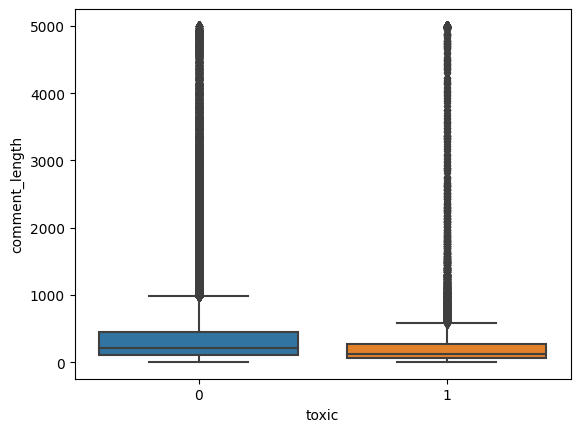

In [ ]:
import seaborn as sns

sns.boxplot(x='toxic', y='comment_length', data=df)


###The Box plot of 'insult' vs 'comment_length'

<Axes: xlabel='insult', ylabel='comment_length'>

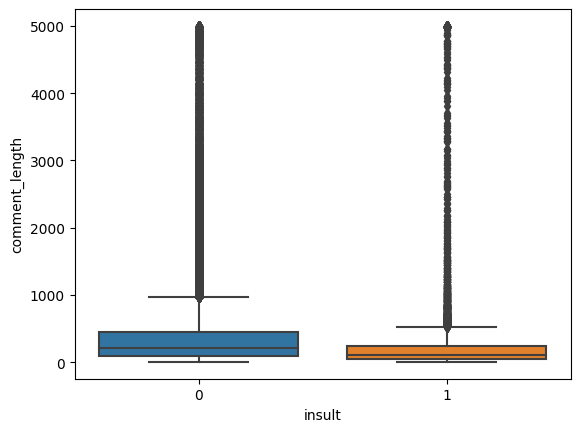

In [ ]:


sns.boxplot(x='insult', y='comment_length', data=df)

###The box plot of 'threat' vs 'comment_length'

<Axes: xlabel='threat', ylabel='comment_length'>

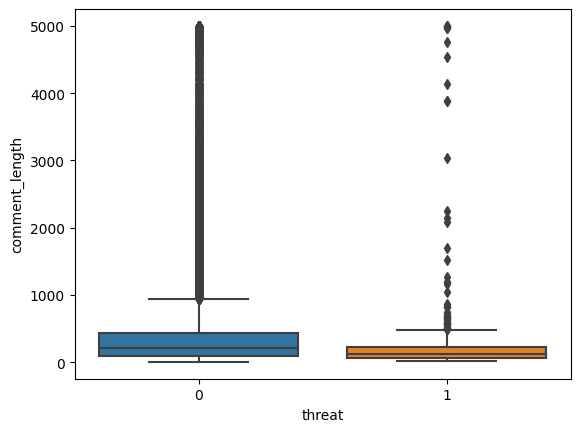

In [ ]:


sns.boxplot(x='threat', y='comment_length', data=df)

###The box plot of 'obscene' vs 'comment_length'

<Axes: xlabel='obscene', ylabel='comment_length'>

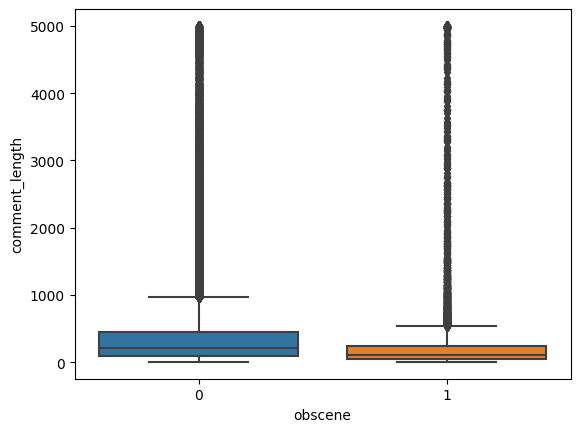

In [ ]:


sns.boxplot(x='obscene', y='comment_length', data=df)

###The box plot of 'identity_hate' vs 'comment_length'

<Axes: xlabel='identity_hate', ylabel='comment_length'>

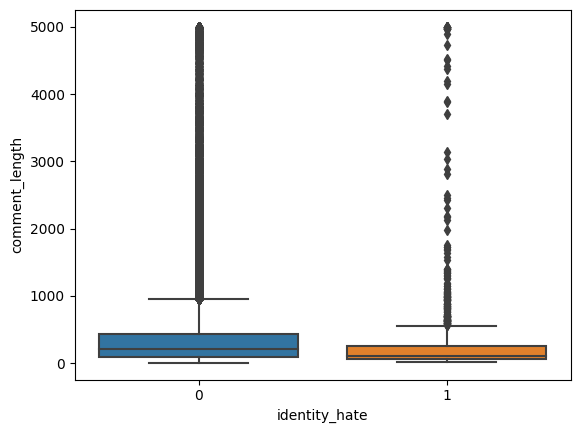

In [ ]:


sns.boxplot(x='identity_hate', y='comment_length', data=df)

###The box plot of 'severe_toxic' vs 'comment_length'

<Axes: xlabel='severe_toxic', ylabel='comment_length'>

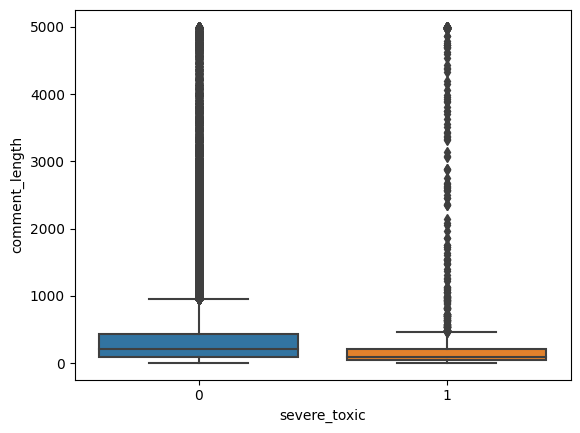

In [ ]:


sns.boxplot(x='severe_toxic', y='comment_length', data=df)

##Create a function that returns word count to make it easier to reuse in the future

In [ ]:

def word_count(text):
    wc = len(text.split())
    return wc

Create a new column 'comment_word_count' to count the word of 'comment_text'

In [ ]:
df['comment_word_count'] = df['comment_text'].apply(word_count)

In [ ]:
#shortest
#df.sort_values(by='comment_word_count').head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_length,comment_word_count
110293,4e142f298c3520e8,Wikipedia:Administrators%27_noticeboard/Incide...,0,0,0,0,0,0,77,1
106891,3b9f582321af808c,http://en.wikipedia.org/wiki/Wikipedia:ELYES,0,0,0,0,0,0,44,1
52475,8c5f7911d56a9a58,User_talk:Blackson#Religious_bias,0,0,0,0,0,0,33,1
141293,f3ea34b46e7bec23,http://www.haaretz.com/news/diplomacy-defense/...,0,0,0,0,0,0,128,1
111438,54231ea3dfe948b1,|needs-infobox=yes,0,0,0,0,0,0,18,1
53787,8fb2aaf04e93061a,92.24.199.233|92.24.199.233]],0,0,0,0,0,0,29,1
109985,4c5cde3ab1a618c9,{{unbloc,0,0,0,0,0,0,8,1
130194,b8878c41e3ea8203,hyper_individualist@yahoo.com,0,0,0,0,0,0,29,1
127744,ab4419c44e80ea1f,User:Wipeouting,0,0,0,0,0,0,15,1
76037,cb865a14eb50f867,http://finance.yahoo.com/news/7-fascinating-nu...,0,0,0,0,0,0,86,1


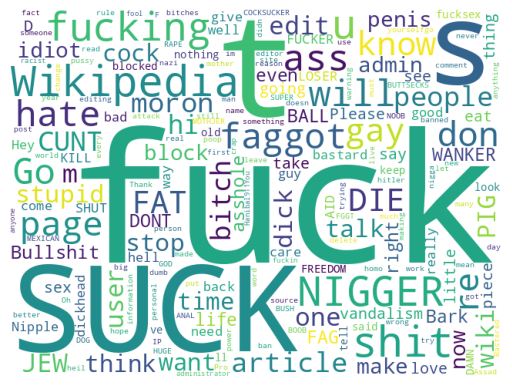

In [ ]:
text_wordcloud = " ".join(tokens)
cloud = WordCloud(background_color="white", width=640, height=480, collocations = False).generate(text_wordcloud)

plt.imshow(cloud)
plt.axis("off")
plt.show()

In [ ]:
s_toxic_df = df[df["severe_toxic"] == 1]
s_toxic_df = s_toxic_df["comment_text"].reset_index(drop=True)
s_toxic_text = ""
for i in range(len(toxic_df)):
    s_toxic_text += " " + toxic_df[i]


some_frac_total_text = toxic_text + s_toxic_text 
print("Characters = "+"{:,}".format(len(some_frac_total_text)))
print("Words = "+"{:,}".format(len(some_frac_total_text.split())))
print("Unique words from first two = "+"{:,}".format(len(set(some_frac_total_text.split()))))

Characters = 9,061,574
Words = 1,568,852
Unique words from first two = 73,682


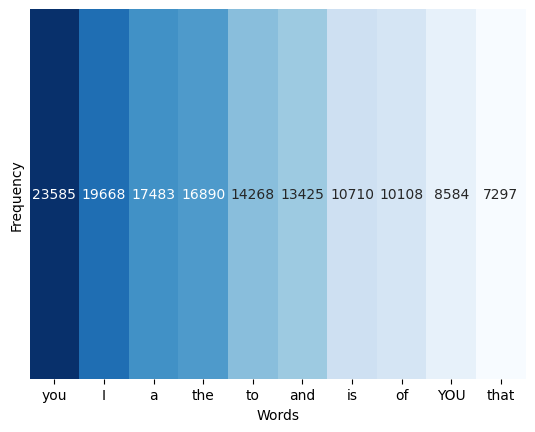

In [ ]:
# Get frequency of each word
word_freq = Counter(tokens)
# Get top 50 words by frequency
top_words = [x[0] for x in word_freq.most_common(10)]
# Create matrix of word frequencies
matrix = [[word_freq[w] for w in top_words]]
# Create heatmap
sns.heatmap(matrix, cmap='Blues', xticklabels=top_words, yticklabels=False, annot=True, fmt='d', cbar=False)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


In [ ]:

# Generate bigrams
bigrams = ngrams(tokens, 2)

# Print the top 10 most common bigrams
print(Counter(bigrams).most_common(10))

[(('is', 'a'), 2495), (('don', 't'), 1962), (('FUCK', 'YOU'), 1890), (('NIGGER', 'NIGGER'), 1882), (('you', 'are'), 1760), (('I', 'am'), 1619), (('moron', 'hi'), 1474), (('hi', 'moron'), 1472), (('of', 'the'), 1389), (('I', 'm'), 1290)]


In [ ]:


# Set up the bigram collocation finder
bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(tokens)

# Filter collocations by frequency and return the top 10
top_collocations = finder.nbest(bigram_measures.raw_freq, 10)

# Print the top 10 collocations
for collocation in top_collocations:
    print(collocation)


('is', 'a')
('don', 't')
('FUCK', 'YOU')
('NIGGER', 'NIGGER')
('you', 'are')
('I', 'am')
('moron', 'hi')
('hi', 'moron')
('of', 'the')
('I', 'm')


## Find top 10 trigrams by PMI

In [ ]:


# Create trigram collocation finder object
tcf = TrigramCollocationFinder.from_words(tokens)

# Define measure to find trigram collocations
tcm = TrigramAssocMeasures()

# Find top 10 trigrams by PMI
trigrams_pmi = tcf.nbest(tcm.pmi, 50)

print(trigrams_pmi)




[('04980', 'IFJVO', 'FGIEROIFGEGJIO'), ('0f', 'Sukhoi_Su', '27_operators'), ('0therf', 'uck1ng', '5cum_bag'), ('1086757', '_All_With_Theories_To_Sell_Carleton_S', '_Coon_Bentley_Glass_Marston_Bates_and_the_struggle_by_life_scientists_in_the_United_States_to_construct_a_social_mission_after_World_War_II'), ('11709', 'Hayseed', 'Dixie'), ('153163814', 'MyToken', 'a9b1bd03'), ('1894', 'Nicolas', 'Notovitch'), ('20People', 'Mulla', '20Sadra'), ('2230', '10092', '1j8j2j1j0j3j1j1j1j1'), ('2526a', '253D216536', '2526po'), ('253D216520', '2526a', '253D216536'), ('253D216536', '2526po', '253D62'), ('2871', '4cc6', 'a4e9'), ('28F0', '508D', '35A5'), ('2CD', 'rerelease', 'GaGa'), ('2C_arrogant', '2C_nasty', '2C_and_rude'), ('304', 'CFE0', 'FA09'), ('306', 'BD61', 'E0F0'), ('35A5', '655A', 'BEC8'), ('38ass', 'fuck43', '3Go'), ('415', '839', '6885'), ('4cc6', 'a4e9', '27811447e751'), ('508D', '35A5', '655A'), ('589YJQ', 'EORITA', 'ETIOYJ'), ('5x', 'AQuestion', 'forU'), ('69366862', 'blogID', '15316

Create a bar chart of the top 10 trigrams by frequency

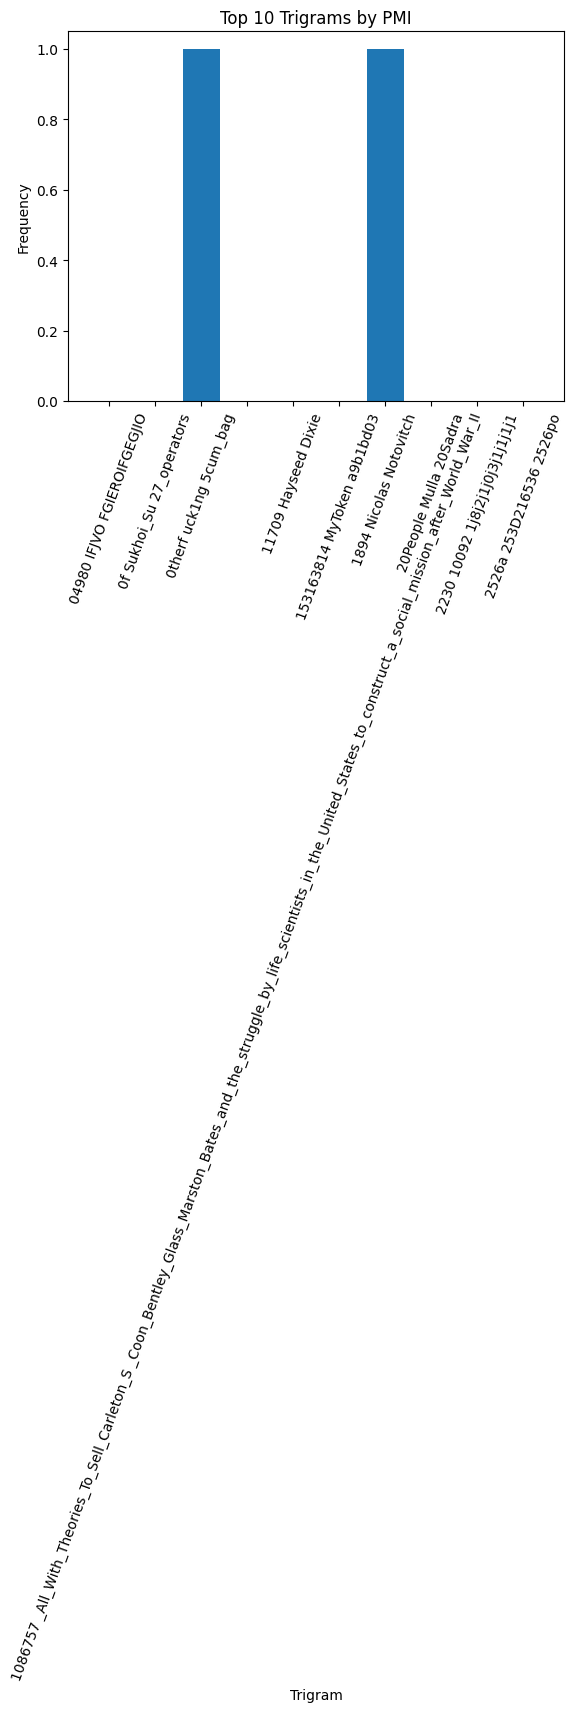

In [ ]:

# Find top 10 trigrams by PMI
trigrams_pmi = tcf.nbest(tcm.chi_sq, 10)

# Create a dictionary to store the frequency of each trigram
trigrams_freq = {}

# Count the frequency of each trigram in the toxic text
for trigram in trigrams_pmi:
    trigram_str = ' '.join(trigram)
    freq = toxic_text.count(trigram_str)
    trigrams_freq[trigram_str] = freq

# Create a bar chart of the top 10 trigrams by frequency
plt.bar(trigrams_freq.keys(), trigrams_freq.values())
plt.xticks(rotation=70)
plt.xlabel('Trigram')
plt.ylabel('Frequency')
plt.title('Top 10 Trigrams by PMI')
plt.show()


Find top 10 trigrams by chi-squared

Analyzing the comments in dataframe using bigram collocation analysis

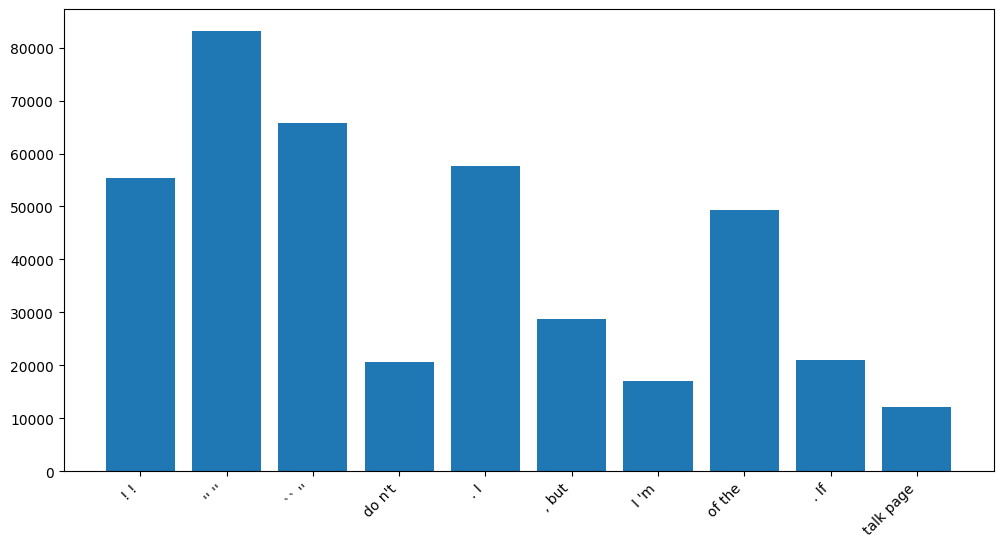

In [ ]:

#from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

#nltk.download('punkt')


#class_names = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
comments = df['comment_text'].values.astype(str)

# Tokenize comments
tokens = []
for comment in comments:
    tokens.extend(nltk.word_tokenize(comment))

# Remove stop words
#stop_words = nltk.corpus.stopwords.words('english')
#tokens = [token.lower() for token in tokens if token.lower() not in stop_words]

# Create bigram collocation finder object
bigram_finder = BigramCollocationFinder.from_words(tokens)

# Define measure to find bigram collocations
bigram_measure = BigramAssocMeasures()

# Find top 10 bigrams by likelihood ratio
bigrams_likelihood = bigram_finder.nbest(bigram_measure.likelihood_ratio, 10)

# Count frequency of each bigram
bigram_freq = []
for bigram in bigrams_likelihood:
    freq = sum(1 for _ in nltk.ngrams(tokens, 2) if _ == bigram)
    bigram_freq.append((bigram, freq))

# Plot bar chart of bigram frequencies
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(range(len(bigram_freq)), [val[1] for val in bigram_freq], align='center')
ax.set_xticks(range(len(bigram_freq)))
ax.set_xticklabels([' '.join(val[0]) for val in bigram_freq], rotation=45, ha='right')
plt.show()


Create a function that returns word count

In [ ]:

def word_count(text):
    wc = len(text.split())
    return wc

In [ ]:
df['comment_word_count'] = df['comment_text'].apply(word_count)

In [ ]:
df['comment_word_count'].describe()

count    159571.000000
mean         67.273527
std          99.230702
min           1.000000
25%          17.000000
50%          36.000000
75%          75.000000
max        1411.000000
Name: comment_word_count, dtype: float64

A bar chart for comment_word_count

<Axes: >

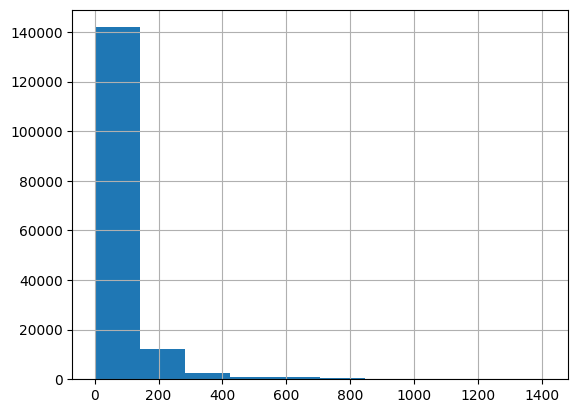

In [ ]:
df['comment_word_count'].hist(bins = 10)

##A horizontal bar graph that displays the frequency of the most common words in the specified column of the DataFrame

###A function that populates bar graph from a dataframe variable

In [ ]:

def wordBarGraphFunction(df,column,title):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    plt.barh(range(50), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:50])])
    plt.yticks([x + 0.5 for x in range(50)], reversed(popular_words_nonstop[0:50]))
    plt.title(title)
    plt.show()

###A bar chart that displays the frequency of the most frequent words in the 'comment_text' column of the DataFrame df. 

###By visualizing the most frequent words in the comments, we can get an idea of what words are commonly used and what themes or topics are being discussed.

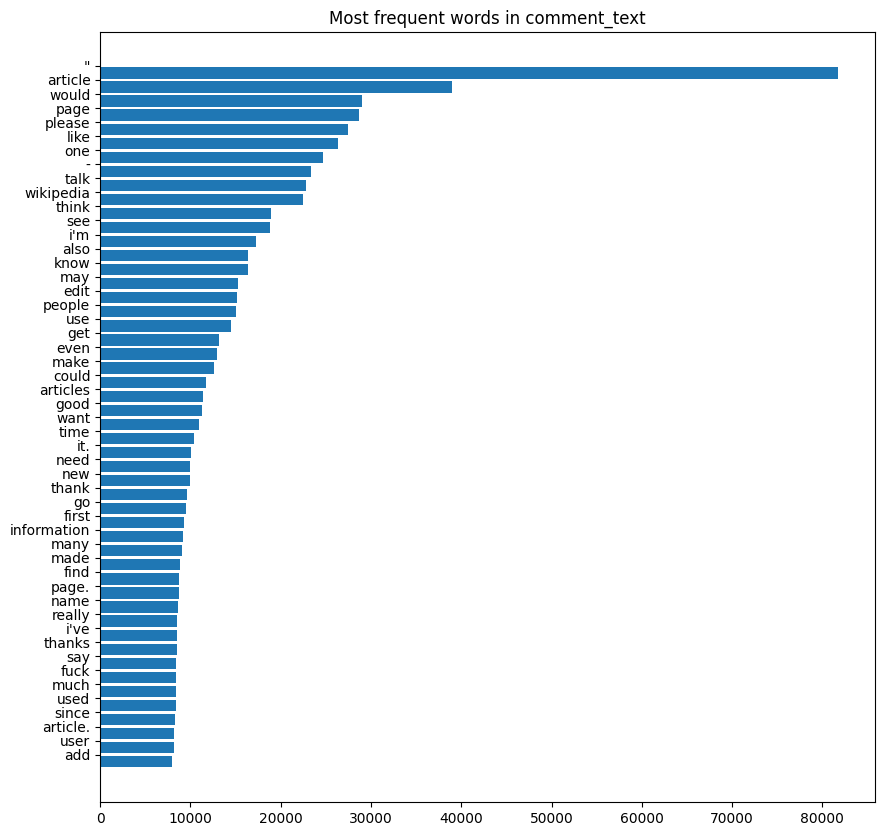

In [ ]:
plt.figure(figsize=(10,10))
wordBarGraphFunction(df,'comment_text',"Most frequent words in comment_text")

In [ ]:
# converting series to string
comment_text = df['comment_text'].to_string()

In [ ]:
#create word tokens
tokenized_words=word_tokenize(comment_text)

##Plot a bar graph of the top 10 most frequently occurring words

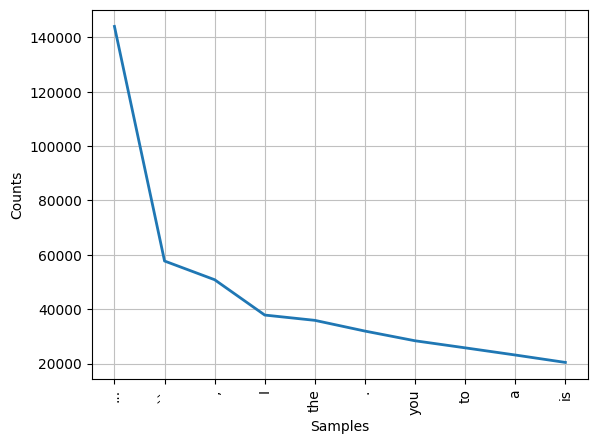

[('...', 144021), ('``', 57711), (',', 50828), ('I', 37829), ('the', 35882), ('.', 31934), ('you', 28367), ('to', 25768), ('a', 23131), ('is', 20403), (':', 19388), ("''", 18516), ('\\n\\n', 17353), ('of', 17076), ('!', 13703), ('that', 13225), ('for', 12317), ('and', 12237), ('?', 10992), ('it', 10840)]


In [ ]:
all_words=nltk.FreqDist(tokenized_words)
all_words.plot(10);
print(all_words.most_common(20))